In [1228]:
from tensorflow.python.client import device_lib   # 이는 나중에 GPU를 사용하고자 할때 필요함.
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9932425408512936993
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 4224854520076084340
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]


2022-07-31 09:39:34.954627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-31 09:39:34.954732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [1229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [1230]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [1231]:
import pandas as pd

df = pd.read_excel("../01. 데이터/Data for headed bars_for DataFrame_220725.xlsx", skiprows = 17, engine = 'openpyxl')
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "Ld", "fcm", "db", "b", "cos,avg",
                                 "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "Fsu at La, test", "dtr", "Ntr", "st"]) # st 제거시
df

,No.,Author,Year,Test type,Remark,Specimen,fy,Ld,fcm,db,...,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,"Fsu at La, test",dtr,Ntr,st
0,1.0,Wright,NaN,Stub-beam,NaN,1-TH01-P-NS-2DB-292,517.500000,12.700,28.460000,25.400,...,101.80,305.000000,0.000000,1.0,45.470000,9.395954,376.153911,0.000,0.0,12.700000
1,2.0,Wright,NaN,Stub-beam,NaN,1-TH02-P-NS-2DB-292,517.500000,12.700,28.460000,25.400,...,101.80,305.000000,0.000000,1.0,45.390000,9.395954,388.271356,0.000,0.0,12.700000
2,3.0,Wright,NaN,Stub-beam,NaN,1-TH03-P-NS-2DB-292,517.500000,12.700,28.460000,25.400,...,101.80,305.000000,0.000000,1.0,47.120000,9.395954,364.470642,0.000,0.0,12.700000
3,4.0,Wright,NaN,Stub-beam,NaN,2-TH04-NP-3S1-208-19,517.500000,285.750,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.960000,9.395954,482.092746,9.500,3.0,127.000000
4,5.0,Wright,NaN,Stub-beam,NaN,2-TH05-NP-3S1-208-19,517.500000,285.750,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,50.800000,9.395954,462.692993,9.500,3.0,127.000000
5,6.0,Wright,NaN,Stub-beam,NaN,2-TH06-NP-3S1-208-13,517.500000,292.100,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.730000,9.395954,453.476630,9.500,3.0,127.000000
6,7.0,Wright,NaN,Stub-beam,NaN,2-TH07-NP-NS-208-16,517.500000,289.052,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.680000,9.395954,293.542144,0.000,0.0,289.052000
7,8.0,Wright,NaN,Stub-beam,NaN,2-TH08-NP-NS-20B-16,517.500000,289.052,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.680000,9.395954,307.317351,0.000,0.0,289.052000
8,9.0,Wright,NaN,Stub-beam,NaN,2-TH09-NP-NS-20B-16,517.500000,289.052,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,49.480000,9.395954,330.585213,0.000,0.0,289.052000
9,10.0,Wright,NaN,Stub-beam,NaN,3-TH04-NP-4S1 -308-19,517.500000,285.750,33.440000,25.400,...,101.80,305.000000,0.000000,1.0,82.190000,9.395954,480.257367,9.500,3.0,76.000000


In [1232]:
df = df[df["Test type"] == "Joint type"]  # 실험방법이 Joint type일 경우: 성능이 크게 개선됨.

df

,No.,Author,Year,Test type,Remark,Specimen,fy,Ld,fcm,db,...,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,"Fsu at La, test",dtr,Ntr,st
134,135.0,Hong,2007.0,Joint type,NaN,#18-M-0.9L-(1),447.700000,888.000,24.200000,57.300,...,146.35,50.000000,0.000000,1.0,853.000000,5.000000,NaN,0.000,0.0,888.000
135,136.0,Hong,2007.0,Joint type,NaN,#18-M-0.7L-(1),447.700000,684.000,24.200000,57.300,...,146.35,254.000000,0.000000,1.0,853.000000,5.000000,NaN,0.000,0.0,684.000
136,137.0,Hong,2007.0,Joint type,NaN,#18-M-0.7L-2R-(1),447.700000,684.000,24.200000,57.300,...,146.35,254.000000,0.000000,1.0,853.000000,5.000000,NaN,0.000,0.0,684.000
137,138.0,Hong,2007.0,Joint type,NaN,#18-M-0.5L-(1),447.700000,479.000,24.200000,57.300,...,146.35,459.000000,0.000000,1.0,853.000000,5.000000,119.721038,0.000,0.0,479.000
138,139.0,Hong,2007.0,Joint type,NaN,#11-M-0.9L-(1),450.600000,372.000,24.600000,35.800,...,92.10,50.000000,0.000000,1.0,369.000000,5.000000,NaN,0.000,0.0,372.000
139,140.0,Hong,2007.0,Joint type,NaN,#11-M-0.7L-(1),450.600000,295.000,24.600000,35.800,...,92.10,127.000000,0.000000,1.0,369.000000,5.000000,NaN,0.000,0.0,295.000
140,141.0,Hong,2007.0,Joint type,NaN,#11-M-0.7L-2R-(1),450.600000,295.000,24.600000,35.800,...,92.10,127.000000,0.000000,1.0,369.000000,5.000000,NaN,0.000,0.0,295.000
141,142.0,Hong,2007.0,Joint type,NaN,#11-M-0.5L-(1),450.600000,217.000,24.600000,35.800,...,92.10,205.000000,0.000000,1.0,369.000000,5.000000,118.787276,0.000,0.0,217.000
142,143.0,Hong,2007.0,Joint type,NaN,#8-M-0.9L-(1),454.800000,264.000,25.100000,25.400,...,67.30,50.000000,0.000000,1.0,278.000000,5.000000,NaN,0.000,0.0,264.000
143,144.0,Hong,2007.0,Joint type,NaN,#8-M-0.7L-(1),454.800000,212.000,25.100000,25.400,...,67.30,102.000000,0.000000,1.0,278.000000,5.000000,NaN,0.000,0.0,212.000


In [1233]:
# original_Fsu =  df["Fsu at La, test"]
# df["Fsu at La, test"] = np.log1p(df["Fsu at La, test"]) # 스케일링을 한다면 굳이 로그 함수를 사용하지 않아도 됩니다.

In [1234]:
y= df["Fsu at La, test"]
y

134            NaN
135            NaN
136            NaN
137     119.721038
138            NaN
139            NaN
140            NaN
141     118.787276
142            NaN
143            NaN
144            NaN
145     112.745098
146     312.500000
147     417.000000
148     501.000000
149     437.000000
150     493.500000
151     592.500000
152     475.000000
153     540.000000
154     468.000000
155     644.000000
156     572.000000
157     607.000000
158     424.000000
159     628.000000
160     334.000000
161     424.000000
162     396.500000
163     367.000000
164     472.500000
165     445.000000
166     439.000000
167     586.000000
168     586.000000
169     588.000000
170     550.000000
171     510.000000
172     588.000000
173     847.500000
174     836.500000
175     685.000000
176     724.500000
177     670.000000
178     698.500000
179     725.000000
180     712.000000
181     721.000000
182     719.000000
183     730.000000
184     731.500000
185     707.000000
186     704.

In [1235]:
df.info()   # dtr, Ntr 데이터가 상대적으로 모자라니, 이 둘을 feature에서 제거함.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 134 to 430
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              297 non-null    float64
 1   Author           297 non-null    object 
 2   Year             297 non-null    float64
 3   Test type        297 non-null    object 
 4   Remark           202 non-null    object 
 5   Specimen         297 non-null    object 
 6   fy               297 non-null    float64
 7   Ld               297 non-null    float64
 8   fcm              297 non-null    float64
 9   db               297 non-null    float64
 10  b                297 non-null    float64
 11  cos,avg          297 non-null    float64
 12  cth              297 non-null    float64
 13  ch               297 non-null    float64
 14  Nh               297 non-null    float64
 15  Bottom cover     293 non-null    float64
 16  Ah/Ab            297 non-null    float64
 17  Fsu at La, tes

In [1236]:
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "dtr", "Ntr", "st"]] # 최대변수 사용
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 누락값 많은 변수 미사용
# Test type - One-hot encoding
X = df[["Test type", "fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 범주형 데이터: Test type 포함
print(X["Test type"].value_counts()) # 범주 갯수 확인

Joint type    297
Name: Test type, dtype: int64


In [1237]:
X = pd.get_dummies(data = X, columns = ["Test type"], prefix = "Test_type") # One-hot Endcoding 실행 -> (0, 0, 0, 1, 0), (1, 0, 0, 0, 0), ...
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
134,447.700000,888.000,24.200000,57.300,350.00,146.35,50.000000,0.000000,1.0,853.000000,5.000000,888.000,1
135,447.700000,684.000,24.200000,57.300,350.00,146.35,254.000000,0.000000,1.0,853.000000,5.000000,684.000,1
136,447.700000,684.000,24.200000,57.300,350.00,146.35,254.000000,0.000000,1.0,853.000000,5.000000,684.000,1
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.000000,0.000000,1.0,853.000000,5.000000,479.000,1
138,450.600000,372.000,24.600000,35.800,220.00,92.10,50.000000,0.000000,1.0,369.000000,5.000000,372.000,1
139,450.600000,295.000,24.600000,35.800,220.00,92.10,127.000000,0.000000,1.0,369.000000,5.000000,295.000,1
140,450.600000,295.000,24.600000,35.800,220.00,92.10,127.000000,0.000000,1.0,369.000000,5.000000,295.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.000000,0.000000,1.0,369.000000,5.000000,217.000,1
142,454.800000,264.000,25.100000,25.400,160.00,67.30,50.000000,0.000000,1.0,278.000000,5.000000,264.000,1
143,454.800000,212.000,25.100000,25.400,160.00,67.30,102.000000,0.000000,1.0,278.000000,5.000000,212.000,1


In [1238]:
y2 = y[~y.isnull()]
y2

137     119.721038
141     118.787276
145     112.745098
146     312.500000
147     417.000000
148     501.000000
149     437.000000
150     493.500000
151     592.500000
152     475.000000
153     540.000000
154     468.000000
155     644.000000
156     572.000000
157     607.000000
158     424.000000
159     628.000000
160     334.000000
161     424.000000
162     396.500000
163     367.000000
164     472.500000
165     445.000000
166     439.000000
167     586.000000
168     586.000000
169     588.000000
170     550.000000
171     510.000000
172     588.000000
173     847.500000
174     836.500000
175     685.000000
176     724.500000
177     670.000000
178     698.500000
179     725.000000
180     712.000000
181     721.000000
182     719.000000
183     730.000000
184     731.500000
185     707.000000
186     704.000000
187     725.500000
188     721.000000
189     724.000000
190     722.500000
191     715.500000
192     723.000000
201     337.771484
202     269.223742
204     351.

In [1239]:
X = X[~y.isnull()]
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.000000,0.000000,1.0,853.000000,5.000000,479.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.000000,0.000000,1.0,369.000000,5.000000,217.000,1
145,454.800000,161.000,25.100000,25.400,160.00,67.30,153.000000,0.000000,1.0,278.000000,5.000000,161.000,1
146,606.000000,301.000,47.900000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,301.000,1
147,606.000000,301.000,47.900000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,370.000,1
148,606.000000,301.000,68.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,301.000,1
149,606.000000,430.000,52.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,430.000,1
150,606.000000,430.000,52.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,370.000,1
151,606.000000,430.000,81.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,430.000,1
152,606.000000,559.000,45.800000,43.000,344.00,43.00,56.000000,172.000000,2.0,272.666667,5.000000,559.000,1


In [1240]:
# X.fillna(0, inplace = True)   # 빈 데이터를을 모두 0으로 채우는 것은 잘못된 결과를 주어서 위험합니다. 차라리 다음과 같이 데이터를 없애는 게 낫습니다.
pd.options.display.max_rows=None

X.dropna(inplace = True)
X


/var/folders/y2/ps98_m_9589fjsw1g7x77n2h0000gn/T/ipykernel_1420/230907408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace = True)


,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.000000,0.000000,1.0,853.000000,5.000000,479.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.000000,0.000000,1.0,369.000000,5.000000,217.000,1
145,454.800000,161.000,25.100000,25.400,160.00,67.30,153.000000,0.000000,1.0,278.000000,5.000000,161.000,1
146,606.000000,301.000,47.900000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,301.000,1
147,606.000000,301.000,47.900000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,370.000,1
148,606.000000,301.000,68.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,301.000,1
149,606.000000,430.000,52.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,430.000,1
150,606.000000,430.000,52.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,370.000,1
151,606.000000,430.000,81.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,430.000,1
152,606.000000,559.000,45.800000,43.000,344.00,43.00,56.000000,172.000000,2.0,272.666667,5.000000,559.000,1


In [1241]:
y2 = y2[X.index] # 목표값도 X와 동일하게 indexing
y2

137     119.721038
141     118.787276
145     112.745098
146     312.500000
147     417.000000
148     501.000000
149     437.000000
150     493.500000
151     592.500000
152     475.000000
153     540.000000
154     468.000000
155     644.000000
156     572.000000
157     607.000000
158     424.000000
159     628.000000
160     334.000000
161     424.000000
162     396.500000
163     367.000000
164     472.500000
165     445.000000
166     439.000000
167     586.000000
168     586.000000
169     588.000000
170     550.000000
171     510.000000
172     588.000000
173     847.500000
174     836.500000
175     685.000000
176     724.500000
177     670.000000
178     698.500000
179     725.000000
180     712.000000
181     721.000000
182     719.000000
183     730.000000
184     731.500000
185     707.000000
186     704.000000
187     725.500000
188     721.000000
189     724.000000
190     722.500000
191     715.500000
192     723.000000
201     337.771484
202     269.223742
204     351.

In [1242]:
# y2 = 0인 값을 제거. 
y2 = y2.loc[(y2 != 0)]
y2

137     119.721038
141     118.787276
145     112.745098
146     312.500000
147     417.000000
148     501.000000
149     437.000000
150     493.500000
151     592.500000
152     475.000000
153     540.000000
154     468.000000
155     644.000000
156     572.000000
157     607.000000
158     424.000000
159     628.000000
160     334.000000
161     424.000000
162     396.500000
163     367.000000
164     472.500000
165     445.000000
166     439.000000
167     586.000000
168     586.000000
169     588.000000
170     550.000000
171     510.000000
172     588.000000
173     847.500000
174     836.500000
175     685.000000
176     724.500000
177     670.000000
178     698.500000
179     725.000000
180     712.000000
181     721.000000
182     719.000000
183     730.000000
184     731.500000
185     707.000000
186     704.000000
187     725.500000
188     721.000000
189     724.000000
190     722.500000
191     715.500000
192     723.000000
201     337.771484
202     269.223742
204     351.

In [1243]:
X = X.loc[y2.index] # y=0인 index의 X값도 제거
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.000000,0.000000,1.0,853.000000,5.000000,479.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.000000,0.000000,1.0,369.000000,5.000000,217.000,1
145,454.800000,161.000,25.100000,25.400,160.00,67.30,153.000000,0.000000,1.0,278.000000,5.000000,161.000,1
146,606.000000,301.000,47.900000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,301.000,1
147,606.000000,301.000,47.900000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,370.000,1
148,606.000000,301.000,68.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,138.166667,5.000000,301.000,1
149,606.000000,430.000,52.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,430.000,1
150,606.000000,430.000,52.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,370.000,1
151,606.000000,430.000,81.200000,43.000,541.80,43.00,56.000000,369.800000,2.0,224.166667,5.000000,430.000,1
152,606.000000,559.000,45.800000,43.000,344.00,43.00,56.000000,172.000000,2.0,272.666667,5.000000,559.000,1


In [1244]:
##학습과 실험 데이터를 분류하고 train과 valid 데이터를 분류한뒤

In [1245]:
# Train, Valid, Test Set으로 분류

In [1246]:
# 1. Train + Valid : Test  = 0.9 : 0.1 --> 먼저 9:1로 나누고

In [1247]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(142)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20, random_state=142)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

In [1248]:
# 2. Train : Valid = 8: 2  --> 9중 20%를 valid로 가져옴

In [1249]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20,random_state=142)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((172, 13), (44, 13), (172,), (44,))

In [1250]:
## X변수들을 MinMaxScaler로 스케일링을 진행하였습니다.
## --> Y도 스케일링 하여야 합니다.

In [1251]:
print(type(X_train))
print(type(X_valid))
print(type(X_test))
print(type(y_train))
print(type(y_valid))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [1252]:
from sklearn.preprocessing import MinMaxScaler

scX = MinMaxScaler()                    # X의 scaler 정의
X_train_scaled = scX.fit_transform(X_train)    
X_valid_scaled = scX.transform(X_valid)
X_test_scaled = scX.transform(X_test)

scY = MinMaxScaler()                    # y의 scaler 정의
y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)) # y_train.values.reshape(-1,1) 는 Pandas Series를 조작하여 차원조절
y_valid_scaled = scY.transform(y_valid.values.reshape(-1,1))
y_test_scaled = scY.transform(y_test.values.reshape(-1,1))

In [1253]:
X_train

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
155,606.000000,559.000,41.800000,43.000,430.00,86.00,56.000000,172.000000,2.0,272.666667,5.000000,120.000,1
259,889.655172,254.000,56.965517,25.400,406.40,62.23,77.893333,102.870000,3.0,260.350000,5.100000,127.000,1
347,889.655172,158.750,34.068966,25.400,520.70,68.58,177.800000,153.670000,3.0,260.350000,5.100000,158.750,1
409,931.034483,438.150,39.724138,35.814,556.26,69.85,82.550000,344.932000,2.0,508.000000,4.900000,438.150,1
415,799.310345,435.102,74.896552,35.814,556.26,71.12,99.060000,342.392000,2.0,508.000000,5.500000,435.102,1
392,889.655172,247.650,33.655172,25.400,444.50,66.04,88.900000,261.620000,2.0,508.000000,10.100000,247.650,1
167,583.000000,744.900,40.500000,57.300,584.46,57.30,56.000000,355.260000,2.0,376.600000,5.000000,275.000,1
400,931.034483,371.602,60.137931,35.814,558.80,71.12,83.820000,154.559000,3.0,508.000000,4.800000,371.602,1
272,799.310345,231.902,39.655172,25.400,444.50,67.31,80.010000,259.080000,2.0,260.350000,7.500000,139.700,1
382,931.034483,424.688,27.931034,35.814,543.56,63.50,96.520000,344.932000,2.0,508.000000,4.800000,101.600,1


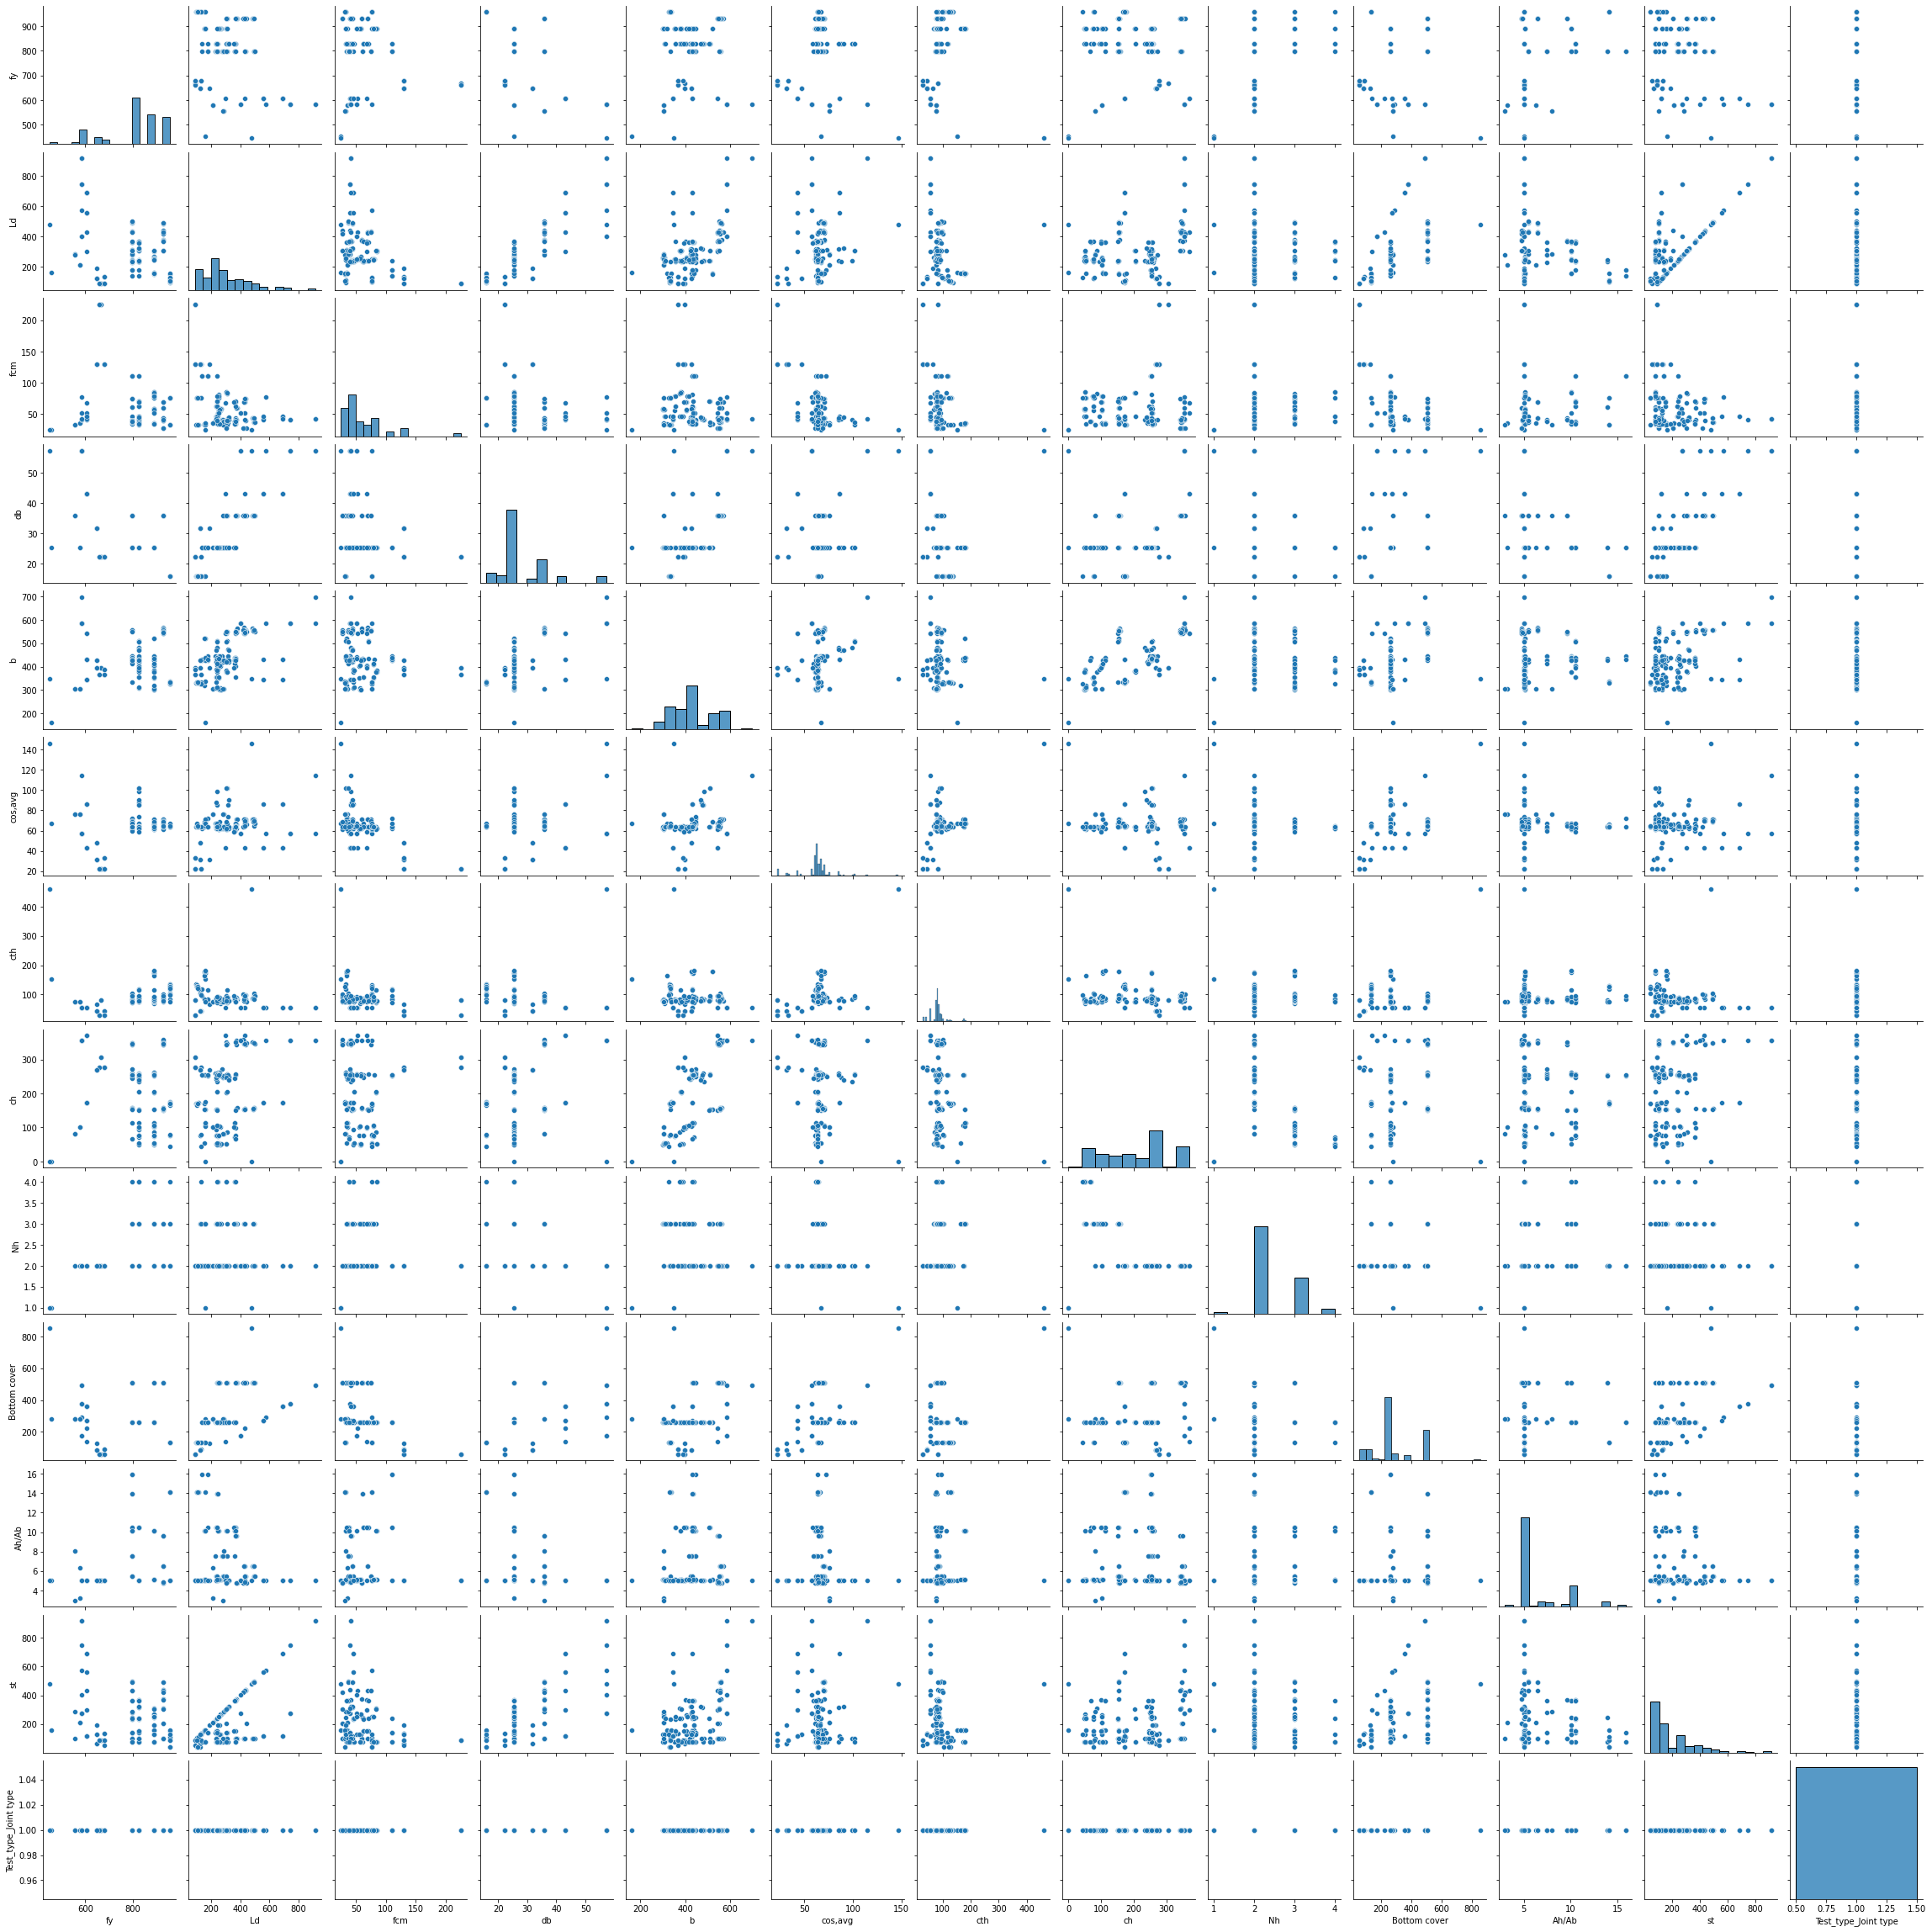

In [1254]:
sns.pairplot(data=X_train)

/Users/baekjw/miniforge3/envs/tftest2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

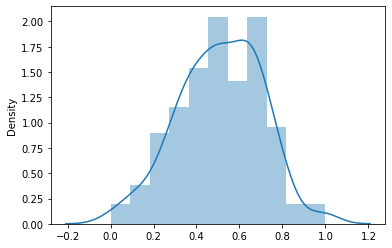

In [1255]:
sns.distplot(y_train_scaled)

In [1256]:
##층을 여기서 더 추가하거나 하여도 오히려 성능이 더 떨어지는 결과가 나옵니다.
# Set random seed
tf.random.set_seed(42)

# 1. Create a model  --> 일단 현재 네트워크 사용: 최종 네트워크는 실험을 통해 결정(성능 vs 비용 비교하여 효율적인 방향으로 설정)
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(10000, activation='relu'),
           tf.keras.layers.Dense(5000, activation='relu'),
           tf.keras.layers.Dense(2500, activation='relu'),
           tf.keras.layers.Dense(1250, activation='relu'),
           tf.keras.layers.Dense(625, activation='relu'),
           tf.keras.layers.Dense(50, activation='relu'), 
           tf.keras.layers.Dense(1, activation='linear')
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['mse'])

In [1257]:
# 3. Fit the model
history = model_1.fit(X_train_scaled, 
                      y_train_scaled, 
                      epochs=1000,    # Load가 크지 않은 문제이므로, 충분히 학습할 것(즉, Underfitting이 되지 않도록 할 것). 
                      verbose = 1,
                      # 단, Overfitting이 발생하면 더이상 학습할 필요가 없음. 
                      #validation_split = 0.1)
                      validation_data=(X_valid_scaled, y_valid_scaled))

Epoch 1/1000


2022-07-31 09:40:08.114700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 66ms/step - loss: 0.1480 - mse: 0.1480 - val_loss: 0.0759 - val_mse: 0.0759
Epoch 2/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.0504 - mse: 0.0504

2022-07-31 09:40:08.563792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 25ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 3/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 4/1000
6/6 [==============================] - 0s 25ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 5/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 6/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 8/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 9/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0178 - mse: 0.0178 - 

6/6 [==============================] - 0s 24ms/step - loss: 8.2329e-04 - mse: 8.2329e-04 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 126/1000
6/6 [==============================] - 0s 24ms/step - loss: 8.1919e-04 - mse: 8.1919e-04 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 127/1000
6/6 [==============================] - 0s 23ms/step - loss: 8.1041e-04 - mse: 8.1041e-04 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 128/1000
6/6 [==============================] - 0s 24ms/step - loss: 8.4283e-04 - mse: 8.4283e-04 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 129/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 130/1000
6/6 [==============================] - 0s 23ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 131/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 132/1000
6/6 [==============================] 

6/6 [==============================] - 0s 24ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 245/1000
6/6 [==============================] - 0s 23ms/step - loss: 8.0982e-04 - mse: 8.0982e-04 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 246/1000
6/6 [==============================] - 0s 23ms/step - loss: 6.6757e-04 - mse: 6.6757e-04 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 247/1000
6/6 [==============================] - 0s 23ms/step - loss: 7.8242e-04 - mse: 7.8242e-04 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 248/1000
6/6 [==============================] - 0s 23ms/step - loss: 8.6876e-04 - mse: 8.6876e-04 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 249/1000
6/6 [==============================] - 0s 33ms/step - loss: 5.8778e-04 - mse: 5.8778e-04 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 250/1000
6/6 [==============================] - 0s 23ms/step - loss: 6.1719e-04 - mse: 6.1719e-04 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 251/1000
6/6 [================

6/6 [==============================] - 0s 24ms/step - loss: 8.5142e-04 - mse: 8.5142e-04 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 304/1000
6/6 [==============================] - 0s 23ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 305/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 306/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 307/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 308/1000
6/6 [==============================] - 0s 25ms/step - loss: 8.4120e-04 - mse: 8.4120e-04 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 309/1000
6/6 [==============================] - 0s 23ms/step - loss: 7.0210e-04 - mse: 7.0210e-04 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 310/1000
6/6 [==============================] - 0s 27m

6/6 [==============================] - 0s 24ms/step - loss: 1.9791e-04 - mse: 1.9791e-04 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 420/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.4109e-04 - mse: 2.4109e-04 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 421/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.3250e-04 - mse: 2.3250e-04 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 422/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.1299e-04 - mse: 3.1299e-04 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 423/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.5092e-04 - mse: 3.5092e-04 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 424/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.1041e-04 - mse: 3.1041e-04 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 425/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.3665e-04 - mse: 3.3665e-04 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 426/1000
6/6 [========

6/6 [==============================] - 0s 24ms/step - loss: 4.4982e-04 - mse: 4.4982e-04 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 536/1000
6/6 [==============================] - 0s 24ms/step - loss: 7.3596e-04 - mse: 7.3596e-04 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 537/1000
6/6 [==============================] - 0s 23ms/step - loss: 7.9546e-04 - mse: 7.9546e-04 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 538/1000
6/6 [==============================] - 0s 23ms/step - loss: 5.0564e-04 - mse: 5.0564e-04 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 539/1000
6/6 [==============================] - 0s 23ms/step - loss: 4.7851e-04 - mse: 4.7851e-04 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 540/1000
6/6 [==============================] - 0s 23ms/step - loss: 4.6878e-04 - mse: 4.6878e-04 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 541/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.6871e-04 - mse: 3.6871e-04 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 542/1000
6/6 [========

6/6 [==============================] - 0s 23ms/step - loss: 2.3264e-04 - mse: 2.3264e-04 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 652/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.6488e-04 - mse: 1.6488e-04 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 653/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.6109e-04 - mse: 1.6109e-04 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 654/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.2910e-04 - mse: 2.2910e-04 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 655/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.9006e-04 - mse: 1.9006e-04 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 656/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.0190e-04 - mse: 3.0190e-04 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 657/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.9514e-04 - mse: 2.9514e-04 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 658/1000
6/6 [========

6/6 [==============================] - 0s 25ms/step - loss: 1.2095e-04 - mse: 1.2095e-04 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 768/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.3695e-04 - mse: 1.3695e-04 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 769/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.6080e-04 - mse: 1.6080e-04 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 770/1000
6/6 [==============================] - 0s 24ms/step - loss: 1.2055e-04 - mse: 1.2055e-04 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 771/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.7134e-04 - mse: 1.7134e-04 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 772/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.8276e-04 - mse: 1.8276e-04 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 773/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.3919e-04 - mse: 1.3919e-04 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 774/1000
6/6 [========

6/6 [==============================] - 0s 23ms/step - loss: 2.9548e-04 - mse: 2.9548e-04 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 884/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.3763e-04 - mse: 2.3763e-04 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 885/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.6747e-04 - mse: 1.6747e-04 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 886/1000
6/6 [==============================] - 0s 23ms/step - loss: 1.9627e-04 - mse: 1.9627e-04 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 887/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.2554e-04 - mse: 2.2554e-04 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 888/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.2195e-04 - mse: 2.2195e-04 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 889/1000
6/6 [==============================] - 0s 23ms/step - loss: 2.6196e-04 - mse: 2.6196e-04 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 890/1000
6/6 [========

6/6 [==============================] - 0s 23ms/step - loss: 2.6276e-04 - mse: 2.6276e-04 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 1000/1000
6/6 [==============================] - 0s 23ms/step - loss: 3.2164e-04 - mse: 3.2164e-04 - val_loss: 0.0112 - val_mse: 0.0112


/var/folders/y2/ps98_m_9589fjsw1g7x77n2h0000gn/T/ipykernel_1420/613838456.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


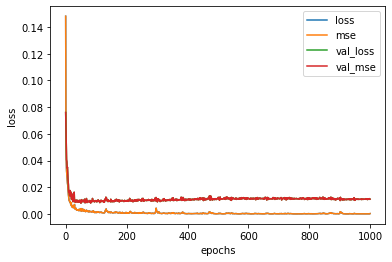

In [1306]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
fig.show()
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "epochs.jpg")

### Prediciton

In [1285]:
y_p = model_1.predict(X_test_scaled)

2/2 [==============================] - 0s 30ms/step


In [1286]:
y_p[:10], y_test_scaled[:10]

(array([[0.00242485],
        [0.6046862 ],
        [0.42757294],
        [0.29792514],
        [0.5876989 ],
        [0.43052882],
        [0.6909848 ],
        [0.6159832 ],
        [0.73433185],
        [0.2957415 ]], dtype=float32),
 array([[0.00639258],
        [0.62554348],
        [0.41992804],
        [0.33601826],
        [0.51259362],
        [0.38061813],
        [0.66582018],
        [0.53521278],
        [0.82342463],
        [0.25137882]]))

In [1287]:
y_test_unscaled = scY.inverse_transform(y_test_scaled)  # scaler.inverse_transform(): scaling을 환원(unscaling)
print(y_test_unscaled)
y_p_unscaled = scY.inverse_transform(y_p)
print(y_p_unscaled)

[[ 118.78727634]
 [ 704.        ]
 [ 509.65517241]
 [ 430.34482759]
 [ 597.24137931]
 [ 472.5       ]
 [ 742.06896552]
 [ 618.62068966]
 [ 891.03448276]
 [ 350.34482759]
 [ 540.        ]
 [ 661.37931034]
 [ 759.31034483]
 [ 189.65517241]
 [ 337.77148436]
 [ 367.        ]
 [ 346.71249424]
 [ 416.55172414]
 [ 550.        ]
 [ 892.4137931 ]
 [ 967.5862069 ]
 [ 951.72413793]
 [ 707.        ]
 [ 354.48275862]
 [ 657.93103448]
 [ 726.89655172]
 [ 907.5862069 ]
 [ 382.47653376]
 [ 312.5       ]
 [ 698.62068966]
 [ 354.66005857]
 [ 291.72413793]
 [ 417.        ]
 [ 275.86206897]
 [ 413.27334556]
 [ 626.89655172]
 [ 777.93103448]
 [ 623.44827586]
 [ 269.22374194]
 [ 544.82758621]
 [ 686.89655172]
 [ 534.48275862]
 [ 391.03448276]
 [ 687.5862069 ]
 [ 349.65517241]
 [ 446.89655172]
 [ 586.        ]
 [ 947.5862069 ]
 [1040.68965517]
 [ 320.68965517]
 [ 760.68965517]
 [ 843.44827586]
 [ 388.27586207]
 [ 538.7723909 ]]
[[115.037025]
 [684.28595 ]
 [516.88104 ]
 [394.33975 ]
 [668.2298  ]
 [519.67487

In [1288]:
# from keras.models import load_model
# model_1 = load_model('modelsave/Model7251545file.h5')

/var/folders/y2/ps98_m_9589fjsw1g7x77n2h0000gn/T/ipykernel_1420/507812038.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


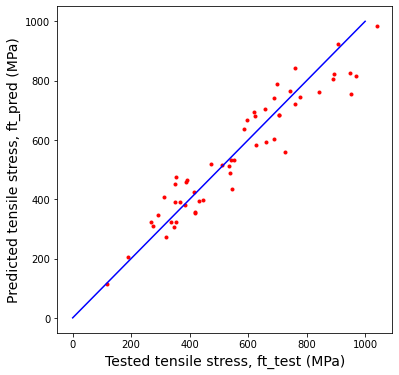

In [1310]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(y_test_unscaled, y_p_unscaled, 'r.')
ax.set_xlabel("Tested tensile stress, ft_test (MPa)", fontsize = 14)
ax.set_ylabel("Predicted tensile stress, ft_pred (MPa)", fontsize = 14)
x = np.linspace(0, 1000, 100)
y = x
ax.plot(x, y, 'b')
fig.show()
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "comparison.jpg")

In [1299]:
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "comparison.jpg")

<Figure size 432x288 with 0 Axes>

In [1300]:
X_test_unscaled = scX.inverse_transform(X_test_scaled)  # scaler.inverse_transform(): scaling을 환원(unscaling)
print(X_test_unscaled)

[[450.6        217.          24.6         35.8        220.
   92.1        205.           0.           1.         369.
    5.         217.           1.        ]
 [649.         127.2        129.9         31.8        396.
   31.8         43.8        268.8          2.          84.8
    5.         127.2          1.        ]
 [799.31034483 233.426       46.27586207  25.4        439.42
   66.04        82.55       256.54         2.         260.35
    5.5        233.426        1.        ]
 [889.65517241 304.8         83.03448276  25.4        378.46
   62.23        76.2         50.8          4.         260.35
    5.1        304.8          1.        ]
 [799.31034483 203.2         40.68965517  25.4        439.42
   67.31        86.36       254.           2.         260.35
    5.5         76.2          1.        ]
 [583.         573.          51.4         57.3        584.46
   57.3         56.         355.26         2.         289.
    5.         275.           1.        ]
 [799.31034483 358.902   

In [1301]:
score = model_1.evaluate(X_test_scaled, y_test_scaled)
print("test loss, test MAE:", score)

2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - mse: 0.0056
test loss, test MAE: [0.005560755264014006, 0.005560755264014006]


In [1302]:
from sklearn.metrics import r2_score
r2_score(y_test_unscaled, y_p_unscaled)

0.8977828347491332

In [1303]:
division = y_p_unscaled / y_test_unscaled
cov = np.std(division) / np.mean(division)
print(cov)

0.1306074469243439


In [1304]:
y_test_unscaled

array([[ 118.78727634],
       [ 704.        ],
       [ 509.65517241],
       [ 430.34482759],
       [ 597.24137931],
       [ 472.5       ],
       [ 742.06896552],
       [ 618.62068966],
       [ 891.03448276],
       [ 350.34482759],
       [ 540.        ],
       [ 661.37931034],
       [ 759.31034483],
       [ 189.65517241],
       [ 337.77148436],
       [ 367.        ],
       [ 346.71249424],
       [ 416.55172414],
       [ 550.        ],
       [ 892.4137931 ],
       [ 967.5862069 ],
       [ 951.72413793],
       [ 707.        ],
       [ 354.48275862],
       [ 657.93103448],
       [ 726.89655172],
       [ 907.5862069 ],
       [ 382.47653376],
       [ 312.5       ],
       [ 698.62068966],
       [ 354.66005857],
       [ 291.72413793],
       [ 417.        ],
       [ 275.86206897],
       [ 413.27334556],
       [ 626.89655172],
       [ 777.93103448],
       [ 623.44827586],
       [ 269.22374194],
       [ 544.82758621],
       [ 686.89655172],
       [ 534.482

In [1305]:
# 모델의 저장
from datetime import datetime
now = datetime.now()
model_1.save("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "file.h5")
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "file.jpg")

<Figure size 432x288 with 0 Axes>